In [ ]:
Now do some exploratory data analysis to figure out which variables have direct and 
clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [3]:
import pandas as pd      
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv("C:\\ML practice Dataset\\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [143]:
left= df[df.left==0]
left.shape

(11428, 10)

In [145]:
retained= df[df.left==1]  
retained.shape

(3571, 10)

**Average for all columns**

In [155]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(df.groupby('left')[numeric_df.columns].mean())

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  left  \
left                                                                  
0               199.060203            3.380032       0.175009   0.0   
1               207.419210            3.876505       0.047326   1.0   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


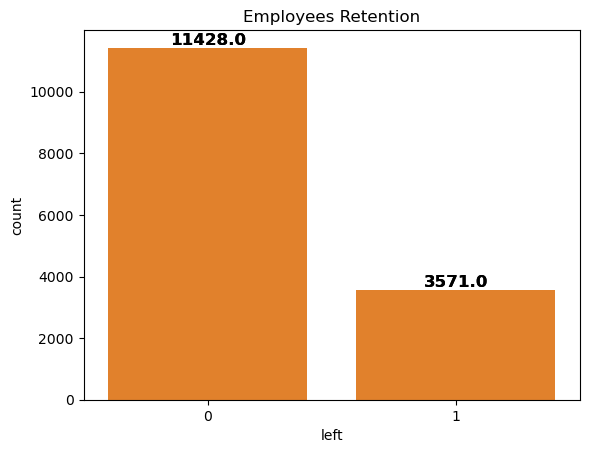

In [36]:
import seaborn as sns   
ax=sns.countplot(x='left', data=df)
plt.title("Employees Retention")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()


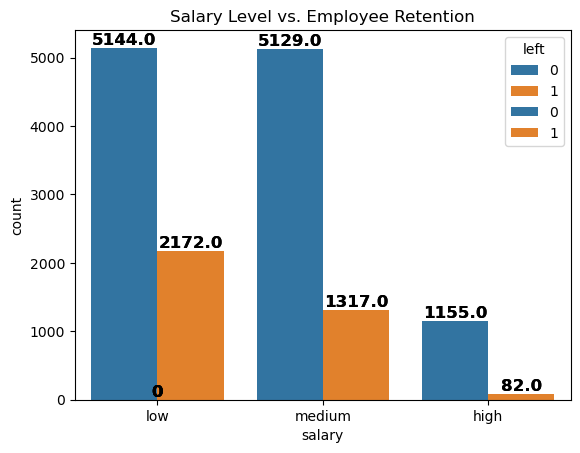

In [56]:
ax=sns.countplot(x='salary', hue='left', data=df)
plt.title("Salary Level vs. Employee Retention")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()


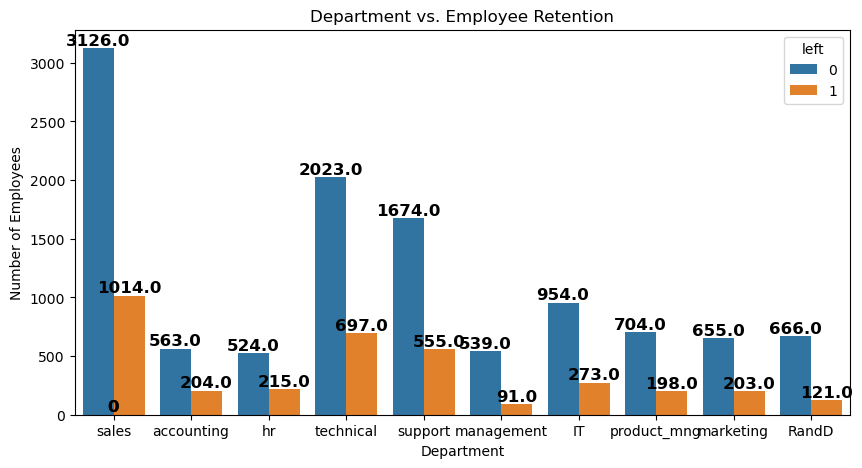

In [60]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Department', hue='left', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
plt.title("Department vs. Employee Retention")
plt.ylabel("Number of Employees")
plt.show()


In [ ]:
From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**

In [76]:
df1= df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [91]:
#Use of dummies
salary_dummies= pd.get_dummies(df1.salary, prefix='salary').astype(int)
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [105]:
df_with_dummies= pd.concat([df1,salary_dummies], axis='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [109]:
df_with_dummies.drop('salary',axis='columns', inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [111]:
X=df_with_dummies
X.head(2)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1


In [115]:
y=df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X, y, train_size=0.2)

In [124]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [126]:
model.fit(X_train,y_train)

LogisticRegression()

In [131]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
#Accuracy of the model
model.score(X_test,y_test)

0.77725